# Deep Learning Project From Scratch

For this project we will pick a dataset of our choice and apply the concepts learned to train deep learning models end to end with PyTorch expermenting different hyper parameters and metrics. 

1) Find a dataset online  
2) Understand and describe the modeling objective clearly

    * A) What type of data is it ? (Images , Text , Audio )
    * B) What type of problem is it ? (Regression , Classification , Generative Modeling )
3) Clean data if required and perform exploratory analysis (plot graphs , ask questions )

4) Modeling 
   *  A) Define a model (Network Architecture)
   *  B) Pick some hyper parameters
   *  C) Train the model 
   *  D) Make predictions on samples 
   *  E) Evaluate on test dataset
   *  F) Save the model weights 
   *  G) Record the metrics
   *  H) Try different hyper parameters and regularization 

  

One option to get our dataset is to download it manually in our computer and upload it in to Google Colab. But this is a manual process that we have to repeat each time we run the google colab notebook because any locally uploaded file will go away the next time we re-run our jupyter notebook. 

* Now let's download our dataset from kaggle using Jovian's open dataset package. 

In [ ]:
!pip install opendatasets --upgrade --quiet # This is because we don't wanna show the output here

In [ ]:
# let's import the open datasets 
import opendatasets as od  
# specify the dataset url 
dataset_url = "https://www.kaggle.com/datasets/alxmamaev/flowers-recognition"
# download the dataset 
od.download(dataset_url , '.')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: birukabere
Your Kaggle Key: ··········


100%|██████████| 225M/225M [00:02<00:00, 92.7MB/s]


Have you tried using a kaggle datasets ? If you directly want to use a kaggle dataset you might be asked for a kaggle username and kaggle key. This is a kaggle's way of verifying a user trying to access their data. Because kaggle is hosting all of this datasets for us for free but they want to make sure that you do not abuse the service , that you are not writing a script that's just downloading hundreds of datasets and giving them a huge cloud traffic , so what they ask you to do is just provide your kaggle credentials. 

The open datasets library uses the kaggle official API for downloading datasets from kaggle. 

# How to get my kaggle key 

Follow these steps to find your API credentials 
1) Sign in to kaggle.com , then click your profile picture on the top right and select "My Account" from the menu 

2) Scroll down to the API section and click "Create NEW API Token" this will download a file kaggle.com with the following contents 

{"User Name " : YOUR_KAGGLE_USERNAME , "KEY" : "YOUR_KAGGLE_KEY"}

3) When you run opendatasets.download , you will be asked to enter your username and kaggle API. 

# ` Import The Dataset In To PyTorch`

Use the image folder class from torchvision

In [ ]:
import os
data_dir = "./flowers-recognition/flowers"
print("List the directories of flowers recognition = {}".format(os.listdir(data_dir)))

List the directories of flowers recognition = ['rose', 'dandelion', 'tulip', 'sunflower', 'daisy']


In [ ]:
# How many datasets are in each class 
import os
data_dir = "./flowers-recognition/flowers"
print("The length of daisy class is = {}".format(len(data_dir + "/daisy")))

The length of daisy class is = 35


In [ ]:
# The length of the dandelion class 
data_dir = "./flowers-recognition/flowers"
dandelion = os.listdir(data_dir + "/dandelion")
print("The length of the dandelion class is = {}".format(len(data_dir + "/dandelion")))
print("print some datasets from the dandelion class = {}".format(dandelion[:5]))

The length of the dandelion class is = 39
print some datasets from the dandelion class = ['18587334446_ef1021909b_n.jpg', '2294126841_e478564e77_n.jpg', '3612582808_4503fa1f8b_m.jpg', '3562861685_8b8d747b4d.jpg', '33914172633_592a6eb74f_n.jpg']


In [ ]:
# we can also check the number of images in each class 
import matplotlib.pyplot as plt 
data_dir = "./flowers-recognition/flowers"
for cls in os.listdir(data_dir):
  print(cls , ":"  , len(os.listdir(data_dir + "/" + cls)))

rose : 784
dandelion : 1052
tulip : 984
sunflower : 733
daisy : 764


This is an important thing to do looking at how many memebers we have from each class so our dataset is a fairly balanced dataset but most of the time we will find , let's say we have 30 different classes and we will find that 80% of the images belongs to 3 or 4 classes , in this situation what we want to do is just exclude some of the classes or we might want to apply some techniques the class imbalanced , techniques like oversampling , where we create multiple copies , images from classes with a few examples , there is also a technique called under sampling , where in a particular epoch we will pick few samples from the larger classes and there is also a technique of giving weights in the loss function to different classes. 

# Class Analysis :- 
Before importing anything , let's find out if the classes are balanced. 

Found 764 elements for  daisy_samples
Found 1052 elements for  dandelion
Found 784 elements for  rose
Found 733 elements for  sunflower
Found 984 elements for  tulip


<BarContainer object of 5 artists>

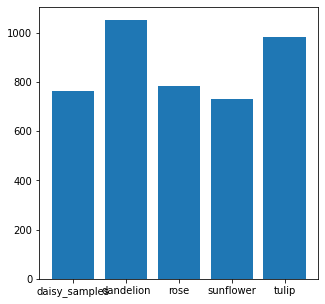

In [ ]:
# set counters 
import os 
data_dir = "./flowers-recognition/flowers"
number_of_daisy_samples = len(os.listdir(data_dir + "/daisy"))
number_of_sunflower_samples = len(os.listdir(data_dir + "/sunflower"))
number_of_dandelion_samples = len(os.listdir(data_dir + "/dandelion"))
number_of_tulip_samples = len(os.listdir(data_dir + "/tulip"))
number_of_rose_samples = len(os.listdir(data_dir + "/rose"))

# Define two dictionaries 
class_names = {0:"daisy_samples" , 1:"dandelion" , 2:"rose" , 3:"sunflower" , 4:"tulip"}
class_count = {0:number_of_daisy_samples , 1:number_of_dandelion_samples , 2:number_of_rose_samples , 3:number_of_sunflower_samples ,4:number_of_tulip_samples}

# printing the results 
print("Found" , class_count[0] , "elements for " , class_names[0])
print("Found" , class_count[1] , "elements for " , class_names[1])
print("Found" , class_count[2] , "elements for " , class_names[2])
print("Found" , class_count[3] , "elements for " , class_names[3])
print("Found" , class_count[4] , "elements for " , class_names[4])

# Plotting the bar plot 
import matplotlib.pyplot as plt 
figsize = plt.subplots(figsize = (5 , 5))
plt.bar([class_names[0] , class_names[1] , class_names[2] , class_names[3] , class_names[4]] , [class_count[0] , class_count[1] , class_count[2] , class_count[3] , class_count[4]])

# `Image Folder Class `

In [ ]:
# Image Folder class 
from torchvision.datasets import ImageFolder
dataset = ImageFolder(data_dir)
# let's print the classes 
print("The classes in the Flower folders are = {}".format(dataset.classes))

The classes in the Flower folders are = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [ ]:
# let's look the shape of the image from the first class 
image , labels = dataset[0]
print(image , "," , labels)

<PIL.Image.Image image mode=RGB size=320x263 at 0x7F514C202710> , 0


Before converting to PyTorch tensors , let's look the image 

Labels:daisy(0)


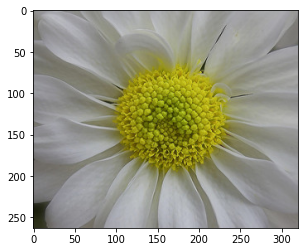

In [ ]:
import matplotlib.pyplot as plt 
def show_one_example(image , labels):
  print("Labels:" + dataset.classes[labels] + "(" + str(labels) + ")")
  plt.imshow(image)

show_one_example(*dataset[0]) # This is a tuple , so the spread operator takes whatever is inside the tuple and then passes each one of them 
# as a separate argument 

Labels:daisy(0)


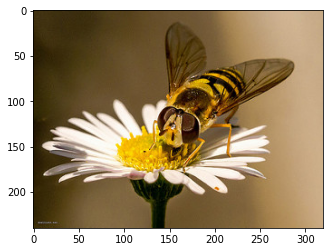

In [ ]:
show_one_example(*dataset[200])

# Image Transform 

In [ ]:
import torchvision.transforms as transforms 
from torchvision.datasets import ImageFolder

transform = transforms.Compose(
    [
        transforms.Resize((64 , 64)) , 
        transforms.ToTensor(),
        transforms.Normalize(
              mean=[0.5, 0.5, 0.5],
              std=[0.5, 0.5, 0.5]
    )
     ]
)
dataset = ImageFolder(data_dir , transform = transform)
print("the entire length of the dataset is = {}".format(len(dataset)))

the entire length of the dataset is = 4317


Labels : daisy (0)


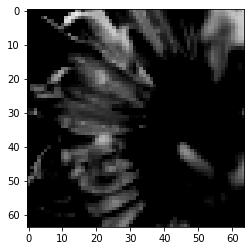

In [ ]:
# we can view the image using matplotlib but we need to change the tensor dimensions to (32 , 32 , 3 ) because matplotlib has the 
# channel dimension to the end. 
image , labels = dataset[120]
# define a function for plotting one example 
def show_example(image , labels):
  print("Labels :" , dataset.classes[labels] , "(" + str(labels) + ")")
  plt.imshow(image.permute(1 , 2 , 0))


# let's call a function 
show_example(*dataset[300]) # This is a tuple , so the spread operator takes whatever is inside the tuple and then passes each one of them 
# as a separate argument 

# Separating the data to training and testing 

since there is no pre-trained validation set , we can set aside a small portion of the training set to be used as the validation set. Let's define a function that randomly picks a given fraction of the element indices for creating the validation set we will also pass a random seed in to the function so we recreate the same training / validation split in the future runs. 

In [ ]:
import numpy as np  
def split_indices(n , val_pct , random_seed):
  # calculate the validation portion 
  n_val = int(n*val_pct) # The reason we change to int is to eliminate fraction 
  # set the random seed for reproducability 
  np.random.seed(random_seed)
  # let's add permutation for the dataset from 0 to n-1
  idxs = np.random.permutation(n)
  return idxs[n_val : ] , idxs[:n_val]

val_percent = 0.1
random_seed = 42 
total_number = len(dataset)
train_indices , validation_indices = split_indices(n = total_number , val_pct = val_percent , random_seed = random_seed)
print("The length of the train indices is = {}".format(len(train_indices)))
print("The length of the validation indices = {}".format(len(validation_indices)))

The length of the train indices is = 3886
The length of the validation indices = 431


### Another way of spliting the dataset

In [ ]:
# Using Random Split for training and validation split 
from torch.utils.data import random_split 
val_pct = 0.1
val_size = int(val_pct * len(dataset))
train_size = len(dataset) - val_size
print("The training size is " , train_size , "The validation size  is " , val_size)

# split the dataset to training and validation dataset 
train_ds , validation_ds = random_split(dataset , [train_size ,val_size])
print("The length of the training dataset is " , len(train_ds) , "The length of the validation dataset is " , len(validation_ds))

The training size is  3886 The validation size  is  431
The length of the training dataset is  3886 The length of the validation dataset is  431


# Numpy's Random Module 

A permutation refers to an arrangment of elements Example:- [3 , 2 , 1] is a permutation of [1 , 2 , 3] and vice versa. 

The numpy random module provides two methods for this :- Shuffle() and permutation() 



```
# Shuffling Arrays:- 
```
Shuffle means changing arrangement of elements in-place that is in the array itself. 


In [ ]:
import numpy as np 
array = np.array([1 , 2 , 3 , 4 , 5])
np.random.shuffle(array)
print(array)
# The shuffle() method changes to the original array 

[5 3 4 1 2]


` Generating permutation of arrays` :- This method a re-arranged array (and leaves the original array unchanged)

In [ ]:
import numpy as np 
array = np.array([1 , 2 , 3 , 4 , 5])
print(np.random.permutation(array)) # the permutation() method a re-arranged array (and leaves the original array unchanged)
print(array)

[3 4 5 1 2]
[1 2 3 4 5]


# Loading the Data 

In [ ]:
import torch 
from torch.utils.data.sampler import SubsetRandomSampler 
batch_size = 100 
# Training Sampler and Training Loader 
train_sampler = SubsetRandomSampler(train_indices)
train_loader = torch.utils.data.DataLoader(dataset , batch_size = batch_size , shuffle = False , num_workers = 4 , pin_memory = True , sampler = train_sampler)
# Shuffle will be false if we are using subset data loader 

# Validation sampler and validation loader 
valid_sampler = SubsetRandomSampler(validation_indices)
validation_loader = torch.utils.data.DataLoader(dataset , batch_size = batch_size , shuffle = False , num_workers = 4 , pin_memory = True , sampler = valid_sampler)
print("The length of the train loader is = {}".format(len(train_loader)))
print("The length of the validation loader is = {}".format(len(validation_loader)))

The length of the train loader is = 39
The length of the validation loader is = 5


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


# `PyTorch from torchvision.utils import make_grid`

What is Grid ? It is a pattern or a structure made from horizontal and vertical lines crossing each other to form squares. 

The torchvision.utils package provides us with make_grid() function to create a grid of images. The images should be torch tensors. It accepts 4D mini-Batch tensor shape (B*C*H*W) or a list of tensor images , all of the same size . The output of this function is a torch tensor containing a grid of images , we can specify the gird of images in a row using the nrow parameter. 

Syntax :- `torch.utils.makegrid(tensor = image , nrow = number_of_rows)`

# Creating Suplots in Matplotlib 

The function subplot create a figure and a set of subplots. The function returns a figure and an axis or an array of axes objects. 

The matplotlib.pyplot.subplots method provides a way to plot multiple plots on a single figure returns a tuple(fig , ax) giving a single figure fig with an array of axes ax.

we can look at the batches from the dataset using the make grid method from torchvision

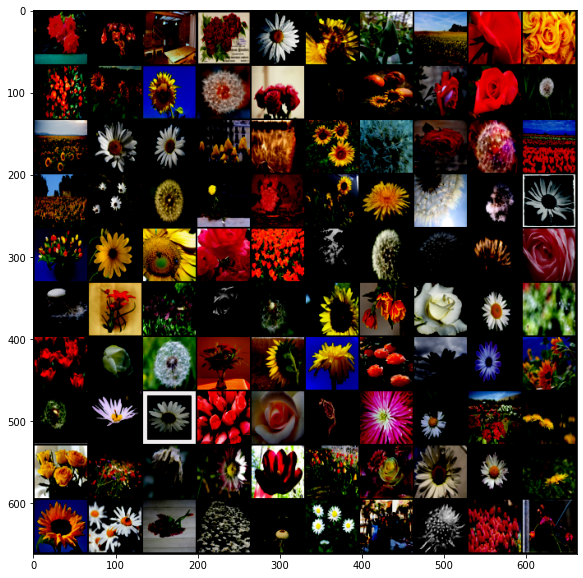

In [ ]:
from torchvision.utils import make_grid 
import matplotlib.pyplot as plt 

def show_batch(data_loader):
  for images , labels in data_loader:
    fig = plt.subplots(figsize = (10 , 10))
    plt.imshow(make_grid(tensor = images , nrow= 10).permute(1 , 2 ,  0 ))
    break

show_batch(data_loader = train_loader )

# `Helper Function For Using A GPU `

In [ ]:
import torch

def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

my_device = get_default_device() 
train_dl = DeviceDataLoader(dl = train_loader, device = my_device)
valid_dl = DeviceDataLoader(dl = validation_loader, device = my_device)

In [ ]:
print(torch.cuda.is_available()) # Printing a boolean value , checking if GPU exists 
image , label = dataset[0]
img_device = to_device(data = image , device = my_device)
print("The device of this image is in = {}".format(img_device.device))


print("The device of the training loader is  = {}".format(train_dl.device))
print("The device of the validaion loader is = {}".format(valid_dl.device))

False
The device of this image is in = cpu
The device of the training loader is  = cpu
The device of the validaion loader is = cpu


# Tensor Detach () 

In PyTorch , the input data has to be processed in the form of a tensor. It also includes a module that calculates gradients automatically for backpropagation. Tensor.detach() method in PyTorch is used to separate a tensor from the  computational graph by returning a new tensor that doesnot require a gradient. If we want to move a tensor from the Graphical Processsing Unit (GPU) to the Centeral Processing Unit (CPU) , then we can use detach() method. It will no take any parameter and return the detached tensor. 

Syntax :-  `tensor.detach()`

Example 1 :- In this example , we will create a one dimensional tensor with a gradient parameter and detach it using a tensor.detach() method requires_grad boolean value True. 

In [ ]:
# import the torch module 
import torch 
# create one dimensional tensor with 5 elements with requires_grad parameter that sets to True
tensor1 = torch.tensor([7.8 , 3.2 , 4.4 , 4.3 , 3.3] , requires_grad = True)
print(tensor1)

# detach the tensor 
print(tensor1.detach())

tensor([7.8000, 3.2000, 4.4000, 4.3000, 3.3000], requires_grad=True)
tensor([7.8000, 3.2000, 4.4000, 4.3000, 3.3000])


Example 2 :- In this example , we will create a two - dimensional tensor with a gradient parameter = False , you will notice that in the output , the tensor doesn't affect if we set requires_grad = False , and detach it using a tensor.detach() method. 

In [ ]:
# import the torch module 
import torch 
# create two dimensional tensor with 5 elements with requires_grad parameter that sets to True 
tensor1 = torch.tensor([[7.8 , 3.2 , 4.4 , 3.3] , [3. , 6. , 7. , 3.]] , requires_grad = False)
print(tensor1)

# detach the tensor 
print(tensor1.detach())

tensor([[7.8000, 3.2000, 4.4000, 3.3000],
        [3.0000, 6.0000, 7.0000, 3.0000]])
tensor([[7.8000, 3.2000, 4.4000, 3.3000],
        [3.0000, 6.0000, 7.0000, 3.0000]])


`Reasons for using torch.detach() :-`  

When a tensor has to be removed from the computational graph, detach can be used. PyTorch helps in automatic differentiation by tracking all the operations to compute the gradient for everything. Thus, a graph is created for all the operations, which will require more memory. Now, if we use detach, the tensor view will be differentiated from the following methods, and all the tracking operations will be stopped. If we need to track furthermore, we have to start a new class or method.




# PyTorch Stack Method ()

PyTorch torch.stack() method joins (concatenates) a sequence of tensors (two or more tensors ) along a new dimension. It inserts new dimension and concatenates the tensors along that dimension. This method joins the tensors with the same dimensions and shape. We could also use torch.cat() to join tensors But here we discuss the torch.stack() method. 

Syntax :-  torch.stack(tensors , dim = 0)
Arguments :-  
* tensors :-  It's a sequence of tensors of same shape and dimensions 
* dim :- It's the dimension to insert. 

In [ ]:
# importing tensors 
import torch 
# creating tensors 
x = torch.tensor([1. , 3. ,6. ,10.])
y = torch.tensor([2. , 7. , 9. , 13.])

# printing above created tensors 
print("Tensor X:" , x)
print("Tensor Y:" , y)

# join above tensor using torch.stack()
print("join tensors")
t = torch.stack((x , y))
# print final tensor after join 

print("Join tensors dimension 0:")
t = torch.stack((x , y) , dim = 0)
print(t)

print("Join tensors dimension 1:")
t = torch.stack((x , y) , dim = 1)
print(t)

Tensor X: tensor([ 1.,  3.,  6., 10.])
Tensor Y: tensor([ 2.,  7.,  9., 13.])
join tensors
Join tensors dimension 0:
tensor([[ 1.,  3.,  6., 10.],
        [ 2.,  7.,  9., 13.]])
Join tensors dimension 1:
tensor([[ 1.,  2.],
        [ 3.,  7.],
        [ 6.,  9.],
        [10., 13.]])


Example 2:- In this example we will join two 2-D tensors using torch.stack() method. 

In [ ]:
# importing torch  
import torch 
# creating tensors 
x = torch.tensor([[1. , 3. , 6.] , [10. , 13. , 20.]])
y = torch.tensor([[2. , 7. , 9.] , [14. , 21. ,34. ]])

# printing the above created tensors 
print("Tensor x" , x)
print("Tensor y" , y)

# join the above tensor using torch.stack()
print("Join tensors")
t = torch.stack((x , y))

# print final tensor after join 
print(t) 

print("Join tensors in dimension 0")
t = torch.stack((x , y) , 0)
print(t)

print("Join tensors in dimension 1 :")
t = torch.stack((x , y) , 1)
print(t)

print("join tensors in dimension 2")
t = torch.stack((x , y ) , 2)
print(t)

Tensor x tensor([[ 1.,  3.,  6.],
        [10., 13., 20.]])
Tensor y tensor([[ 2.,  7.,  9.],
        [14., 21., 34.]])
Join tensors
tensor([[[ 1.,  3.,  6.],
         [10., 13., 20.]],

        [[ 2.,  7.,  9.],
         [14., 21., 34.]]])
Join tensors in dimension 0
tensor([[[ 1.,  3.,  6.],
         [10., 13., 20.]],

        [[ 2.,  7.,  9.],
         [14., 21., 34.]]])
Join tensors in dimension 1 :
tensor([[[ 1.,  3.,  6.],
         [ 2.,  7.,  9.]],

        [[10., 13., 20.],
         [14., 21., 34.]]])
join tensors in dimension 2
tensor([[[ 1.,  2.],
         [ 3.,  7.],
         [ 6.,  9.]],

        [[10., 14.],
         [13., 21.],
         [20., 34.]]])


# `Model Building From The Scratch `



Let's create a base class called ImageClassificationBase

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class ImageClassificationBase(nn.Module):
    # Accepting information from the fit function 
    def training_step(self, batch):
        "calculate loss for a batch of training data"
        images, labels = batch # The batch is a tuple
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss 
        return loss , labels , out  # return the loss to the fit function 
    
  
    # Accepting information from the evaluate function 
    def validation_step(self, batch):
        "calculate loss & accuracy for a batch of validation data"
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # passing the output and labels information to the accuracy function 
        return {'val_loss': loss.detach(), 'val_acc': acc} # return the val loss and accuracy to the evaluate function 


    # Accepting information from the evaluate function 
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs] # looping through the outputs and store the validation loss , for each batch
        epoch_loss = torch.stack(batch_losses).mean()   # Combine the losses of each batch and average it 
        batch_accs = [x['val_acc'] for x in outputs] # looping through the outputs and store the validation accuracy , for each batch
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies of each batch and average it 
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()} # return the loss and the accuracy of the epoch to the evaluate function

    # Accepting information from the evaluate function 
    def epoch_end(self, epoch, result):
       # Printing the training loss , the validation accuracy and the validation loss  
        print("Epoch [{}], train_loss: {:.4f}, train_accuracy:{:.4f} ,val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['train_accuracy'] , result['val_loss'], result['val_acc']))
        
# Accepting information from the validation_step        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))
    
@torch.no_grad()
# acceping the model and the validationi information from the fit function 
def evaluate(model, val_loader):
    """Evaluates the model's performance on the validation set"""
    model.eval() # On the validation mode 
    outputs = [model.validation_step(batch) for batch in val_loader] # looping through the validation loader and pass the batch information to the validation step
    return model.validation_epoch_end(outputs) # passing the information to the validation epoch end function and return the result to the fit function

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = [] # Accumulating the history 
    optimizer = opt_func(model.parameters(), lr) # passing the model parameter and the learning rate 
    for epoch in range(epochs): # iterating through the epochs 
        # Training Phase 
        model.train() # Training phase 
        train_losses = [] # Accumulating the training losses 
        correct_samples = 0 # Accumulaing the correct samples 
        total = 0 # Accumulating the size of the dataset
        for batch in train_loader: # Looping through the train loader 
            loss , labels, out  = model.training_step(batch) # passing the batch information to the training step function 
            train_losses.append(loss) # appending the train losses 
            loss.backward() # Calculating the gradient
            optimizer.step() # Updating the parameters 
            optimizer.zero_grad() # clearing the gradients 
            
            # calculating the accuracy for the training 
            _ ,scores = out.max(dim = 1)
            correct_samples += (scores == labels).sum().item()
            total +=labels.size(0)

        # Validation phase
        result = evaluate(model, val_loader) # Passing the model and the validation loader information to the evaluate function
        result['train_loss'] = torch.stack(train_losses).mean().item() 
        result['train_accuracy'] = (correct_samples / total) * 100
        model.epoch_end(epoch, result) # passing the epoch and result information to the epoch end function 
        history.append(result) # Appending the result of the validation loss , validation accuracy and the training loss information to the history 
    return history

def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

# Defining the ResNet9 Model 
class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        # Input: 128 x 3 x 64 x 64
        self.conv1 = conv_block(in_channels, 64) # 128 x 64 x 64 x 64
        self.conv2 = conv_block(64, 128, pool=True) # 128 x 128 x 32 x 32
        self.res1 = nn.Sequential(conv_block(128, 128), # 128 x 128 x 32 x 32
                                  conv_block(128, 128)) # 128 x 128 x 32 x 32
        
        self.conv3 = conv_block(128, 256, pool=True) # 128 x 256 x 16 x 16
        self.conv4 = conv_block(256, 512, pool=True) # 128 x 512 x 8 x 8 
        self.res2 = nn.Sequential(conv_block(512, 512), # 128 x 512 x 8 x 8 
                                  conv_block(512, 512)) # 128 x 512 x 8 x 8 
        
        self.classifier = nn.Sequential(nn.AdaptiveMaxPool2d(1), # 128 x 512 x 1 x 1 
                                        nn.Flatten(), # 128 x 512
                                        nn.Dropout(0.2),
                                        nn.Linear(512, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

my_model = to_device(ResNet9(3, len(dataset.classes)), my_device)
print(my_model)

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

### Checking Our Model is On GPU 

In [ ]:
# Checking our model is in GPU 
# print(model.device) # we can't do this
# But we can check using like this 
my_model.conv1[0].weight.device

device(type='cpu')

In [ ]:
# pass one batch of input tensor through the model 
torch.cuda.empty_cache()
for batch in train_dl:
    images, labels = batch
    print('images.shape', images.shape)
    print('images.device', images.device)
    preds = my_model(images)
    print('preds.shape', preds.shape)
    break

images.shape torch.Size([100, 3, 64, 64])
images.device cpu
preds.shape torch.Size([100, 5])


Here if it says Cuda out of memory , this means we used large amount of batch size or large amount of image size or batch size , so play with those to get rid of these errors 

There will be a problem as we can't multiply like mat1 and mat2 can not be multiplied , when this case happened go and refine each of your dimensions or use AdaptiveMaxPool2d(1)

All the pre-trained model has AdaptiveMaxPool2d(1) , they can work with images of any size. 


# `Training The Model `

We will evaluate the model on the validation data loader because we want to get the bench mark of where is the model starting from 

In [ ]:
# This will print out th evalidation accuracy and the validation loss 
history = [evaluate (my_model , valid_dl) ]
print(history)

[{'val_loss': 1.6108821630477905, 'val_acc': 0.1922580748796463}]


Let's call the fit function which contains the training loss , the validation loss , the validation accuracy and the validation loss 

In [ ]:
import torch
history += fit(epochs = 5 , lr = 0.001 , model = my_model , train_loader = train_dl , val_loader = valid_dl , opt_func = torch.optim.Adam)
print(history) # This will print out the training loss , the validation loss and the validation accuracy  

Epoch [0], train_loss: 1.3953, train_accuracy:52.8307 ,val_loss: 1.2243, val_acc: 0.5617
Epoch [1], train_loss: 0.9640, train_accuracy:63.7159 ,val_loss: 1.0409, val_acc: 0.5968
Epoch [2], train_loss: 0.8083, train_accuracy:69.9691 ,val_loss: 0.8121, val_acc: 0.7028
Epoch [3], train_loss: 0.7105, train_accuracy:73.1086 ,val_loss: 1.0342, val_acc: 0.6557
Epoch [4], train_loss: 0.6541, train_accuracy:75.9907 ,val_loss: 1.1234, val_acc: 0.6450
[{'val_loss': 1.6108821630477905, 'val_acc': 0.1922580748796463}, {'val_loss': 1.224318504333496, 'val_acc': 0.5616773962974548, 'train_loss': 1.3952916860580444, 'train_accuracy': 52.830674215131246}, {'val_loss': 1.0409390926361084, 'val_acc': 0.5967742204666138, 'train_loss': 0.9639569520950317, 'train_accuracy': 63.71590324240864}, {'val_loss': 0.8121185302734375, 'val_acc': 0.7028387188911438, 'train_loss': 0.8083242177963257, 'train_accuracy': 69.96911991765312}, {'val_loss': 1.034238338470459, 'val_acc': 0.6556774377822876, 'train_loss': 0.71

# `Plotting The Trends` 

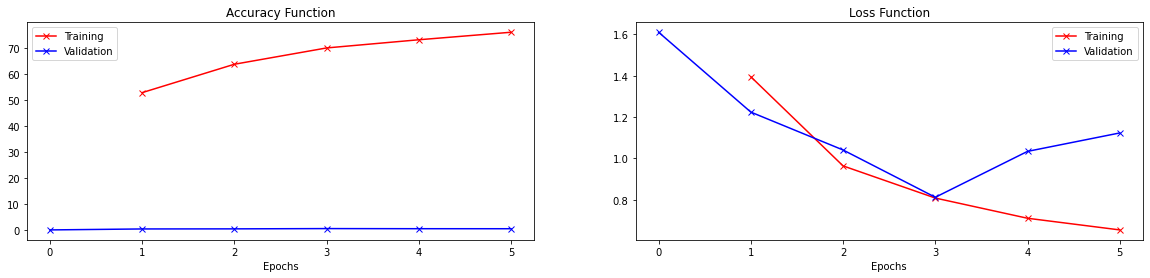

In [ ]:
# plotting the training accuracy and the validation accuracy 
def plot(history):
  import matplotlib.pyplot as plt
  plt.figure(figsize = (20 , 4))

  # Accuracy Function 
  plt.subplot(1 , 2 , 1)
  train_accuracy = [x.get('train_accuracy') for x in history] 
  validation_accuracy = [x['val_acc'] for x in history]
  plt.plot(train_accuracy , "-rx")
  plt.plot(validation_accuracy , "-bx")
  plt.xlabel("Epochs")
  plt.legend(["Training" , "Validation"])
  plt.title("Accuracy Function")

  # Loss Function 
  plt.subplot(1 , 2 , 2)
  train_losses = [x.get('train_loss') for x in history]
  val_losses   = [x['val_loss'] for x in history]
  plt.plot(train_losses , "-rx")
  plt.plot(val_losses , "-bx")
  plt.xlabel("Epochs")
  plt.legend(["Training" , "Validation"])
  plt.title("Loss Function")

# Calling the function 
# Now let's call the function 
plot(history) 

Both the validation and the training losses are still going down and we will see some rise up at some points , this is because we are started the new epoch , different optimizers operate in a different ways so sometimes what we will see is that if we are calling the fit function multiple times , in the first epoch the loss might actually go up because that's just how optimizers operate. 

So after we done some analysis , we might see that the training and validation losses are still going down. 

So let's train it for some more time. 

In [ ]:
import torch
history += fit(epochs =5 , lr = 0.0001 , model = my_model , train_loader = train_dl , val_loader = valid_dl , opt_func = torch.optim.Adam)
print(history)

KeyboardInterrupt: ignored

As soon as our validation loss or training loss starts to flatten out , one good idea will to reduce the learning rate by a factor of 10 because then your model is in the area near to the optimum value but it's just bouncing around because of high learning rate. So give a smaller learning rate reduced by a factor of 10 , will help us having a better result. 



In [ ]:
# plotting the training accuracy and the validation accuracy 
def plot(history):
  import matplotlib.pyplot as plt
  plt.figure(figsize = (20 , 4))

  # Accuracy Function 
  plt.subplot(1 , 2 , 1)
  train_accuracy = [x.get('train_accuracy') for x in history] 
  validation_accuracy = [x['val_acc'] for x in history]
  plt.plot(train_accuracy , "-rx")
  plt.plot(validation_accuracy , "-bx")
  plt.xlabel("Epochs")
  plt.legend(["Training" , "Validation"])
  plt.title("Accuracy Function")

  # Loss Function 
  plt.subplot(1 , 2 , 2)
  train_losses = [x.get('train_loss') for x in history]
  val_losses   = [x['val_loss'] for x in history]
  plt.plot(train_losses , "-rx")
  plt.plot(val_losses , "-bx")
  plt.xlabel("Epochs")
  plt.legend(["Training" , "Validation"])
  plt.title("Loss Function")

# Calling the function 
# Now let's call the function 
plot(history) 

After more and more training the gap between training and validation starts to increase , that is the point where your model is starting to overfit , A lot of people tend to think overfitting happens when the training loss is less than the validation loss , that is not true , our training loss always going to be less than the validation loss if we train long enough because the model has seen the training data and the training data is used to perform gradient descent and change the weights. 

Overfitting is when the validation loss starts to increase and the training loss continues to decrease. 

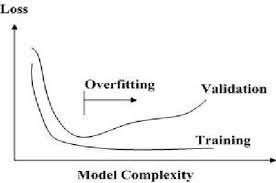

# Testing With Indiviual Images 

While we have been tracking the overall accuracy of the model so far. It is also a good idea to look at the model's result on sample images. Let's test our model from the pre-trained test dataset of 10,000 images , we begin by creating a test dataset using the ImageFolder class. 

In [ ]:
# create a new folder in the flowers-recognition dir and upload some images there

In [ ]:
import torch 
import os
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms 
data_dir = "./flowers-recognition-pneumonia/test"
print("The contents in the data dir are " , os.listdir(data_dir))
for cls in os.listdir(data_dir):
  print(cls , ":" , len(os.listdir(data_dir + "/" + cls)))

test_transform = transforms.Compose([
     transforms.Resize((50 , 50)),
    #transforms.RandomHorizontalFlip(p=0.5),
    #transforms.RandomVerticalFlip(p=0.5),
    #transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
    #transforms.RandomRotation(degrees=(30, 70)),
    transforms.ToTensor(),
   
])
test_dataset = ImageFolder(root = data_dir , transform = test_transform)


# Let's define a helper function predict_image , which it returns label for a single image tensor 
def predict_image(img , model):
  # convert to batch of 1 , because the image is now C*H*W but our model expects N*C*H*W
    xb = img.unsqueeze(0)
    # let's move it to the GPU 
    test_img = to_device(data = xb , device = my_device)
    # Get a prediction from the model 
    predictions = model(test_img)
    # pick the index with the highest probability 
    _ , scores = torch.max(predictions , dim = 1) # but i guess his must be argmax to return the index
    # retrieve the class label
    return test_dataset.classes[scores[0].item()]


  # plotting 
import matplotlib.pyplot as plt 
def show_example(image , label):
  print("Label : " , test_dataset.classes[label] , "(" + str(label) + ")" , "Predicted image " , predict_image(image , model))
  print(plt.imshow(image.permute(1 , 2 , 0)))

show_example(*test_dataset[0])


torch.Size([3, 1056, 1584])
